In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
db = pd.read_csv('D:/SD03Q06/Social_Network_Ads.csv')

In [3]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   EstimatedSalary   400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


# PLOTS

<AxesSubplot:xlabel='Gender ', ylabel='count'>

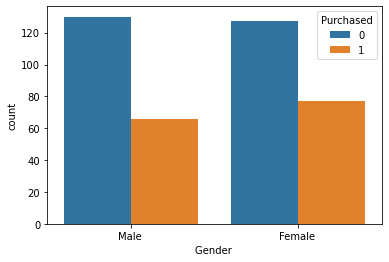

In [5]:
sns.countplot(x='Gender ',hue='Purchased',data=db)

In [6]:
db['Age '].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age , dtype: float64

<AxesSubplot:xlabel='Age_category', ylabel='count'>

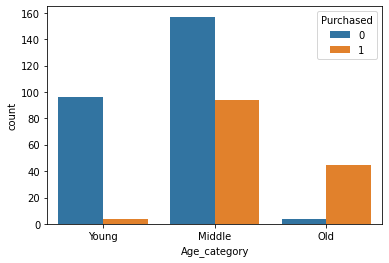

In [7]:
def categorize(a):
    if a<30:
        return "Young"
    elif a>=30 and a<=50:
        return "Middle"
    elif a>50:
        return "Old"
    
db['Age_category']=db['Age '].apply(lambda x: categorize(x))

sns.countplot(x='Age_category',hue='Purchased',data=db)

In [8]:
db['EstimatedSalary '].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary , dtype: float64

<AxesSubplot:xlabel='Salary_category', ylabel='count'>

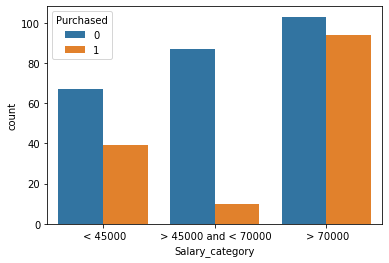

In [9]:
def category2(a):
    if a<45000:
        return " < 45000"
    elif a>=45000 and a<=70000:
        return " > 45000 and < 70000"
    elif a> 70000:
        return " > 70000"
    
db['Salary_category']=db['EstimatedSalary '].apply(lambda x: category2(x))

sns.countplot(x='Salary_category',hue='Purchased',data=db)

# Encoding gender column

In [10]:
db['Gender ']=db['Gender '].apply(lambda x: 0 if x=="Female " else 1)

# removing user id column

In [11]:
db.drop(['User ID '],axis=1,inplace=True)

In [12]:
db

,Gender,Age,EstimatedSalary,Purchased,Age_category,Salary_category
0,1,19,19000,0,Young,< 45000
1,1,35,20000,0,Middle,< 45000
2,0,26,43000,0,Young,< 45000
3,0,27,57000,0,Young,> 45000 and < 70000
4,1,19,76000,0,Young,> 70000
...,...,...,...,...,...,...
395,0,46,41000,1,Middle,< 45000
396,1,51,23000,1,Old,< 45000
397,0,50,20000,1,Middle,< 45000
398,1,36,33000,0,Middle,< 45000


# Applying standard scaler

In [13]:
X= db.iloc[:, [0,1,2]].values  
Y= db["Purchased"].values

In [14]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [15]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

# Splitting the dataset

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0 ) 

# knn

In [17]:
from scipy.stats import mode
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] =mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
from scipy.stats import mode
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] =mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
model_knn = K_Nearest_Neighbors_Classifier( K = 3 )       
model_knn.fit( X_train, Y_train ) 

    # Prediction on test set 
Y_pred_knn = model_knn.predict( X_test ) 

   # measure performance 
      
correctly_classified = 0
correctly_classified1 = 0
      
    # counter 
count = 0
for count in range(np.size(Y_pred_knn)):
    if Y_test[count] == Y_pred_knn[count] :
        correctly_classified = correctly_classified + 1
    count = count + 1
print( "Accuracy on test set by knn model       :  ", (correctly_classified / count ) * 100 ) 

Accuracy on test set by knn model       :   92.5
